In [1]:
import os
!pwd

/Users/edison/Desktop/Y4S2/Capstone/Project


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import scipy

In [4]:
df_train = pd.read_csv("CMaps/train_FD001.txt", sep=" ", header=None)
df_test = pd.read_csv("CMaps/test_FD001.txt", sep=" ", header=None)

In [5]:
print(f"Train: {df_train.shape}")
print(f"Test: {df_test.shape}")

Train: (20631, 28)
Test: (13096, 28)


### Append train and test together for simplicity

Split in the later stages with a smaller test_size proportion

In [6]:
df = df_train.append(df_test)
print(f"df: {df.shape}")

df: (33727, 28)


### Information on Data

- Column 1: Engine ID 

- Column 2: Remaining Useful (In cycles)  

- Column 3-5: Operational Settings 

- Column 6-28: Sensor data 

In [7]:
columns = ["Unit_ID", "RUL", 
           "OS_1", "OS_2", "OS_3", 
           "SD_1", "SD_2", "SD_3","SD_4", "SD_5", 
           "SD_6","SD_7", "SD_8", "SD_9", "SD_10",
           "SD_11", "SD_12", "SD_13", "SD_14", "SD_15", 
           "SD_16","SD_17", "SD_18", "SD_19", "SD_20", 
           "SD_21", "SD_22", "SD_23"]


In [8]:
df_train.columns = columns
df_test.columns = columns
df.columns = columns

In [9]:
df.head()

,Unit_ID,RUL,OS_1,OS_2,OS_3,SD_1,SD_2,SD_3,SD_4,SD_5,...,SD_14,SD_15,SD_16,SD_17,SD_18,SD_19,SD_20,SD_21,SD_22,SD_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit_ID,33727.0,51.521066,2.886654e+01,1.0000,27.0000,52.0000,77.0000,100.0000
RUL,33727.0,96.393572,6.510053e+01,1.0000,43.0000,88.0000,140.0000,362.0000
OS_1,33727.0,-0.000010,2.193263e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
OS_2,33727.0,0.000003,2.934356e-04,-0.0006,-0.0002,0.0000,0.0003,0.0007
OS_3,33727.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
SD_1,33727.0,518.670000,7.276065e-12,518.6700,518.6700,518.6700,518.6700,518.6700
SD_2,33727.0,642.601005,4.747891e-01,641.1300,642.2700,642.5600,642.8900,644.5300
SD_3,33727.0,1589.581927,5.840324e+00,1569.0400,1585.5300,1589.2100,1593.1600,1616.9100
SD_4,33727.0,1407.303559,8.432656e+00,1382.2500,1401.2300,1406.4500,1412.2400,1441.4900
SD_5,33727.0,14.620000,3.884950e-12,14.6200,14.6200,14.6200,14.6200,14.6200


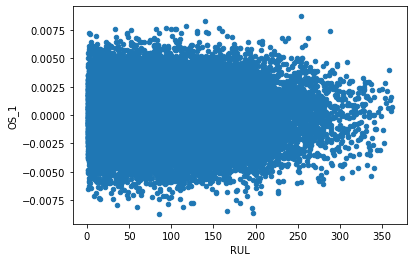

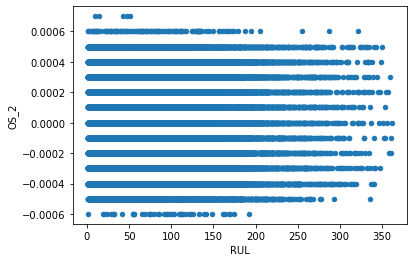

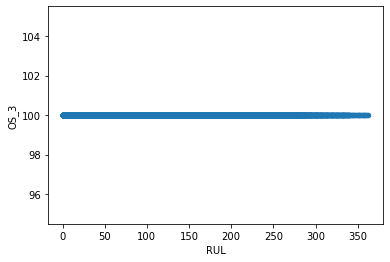

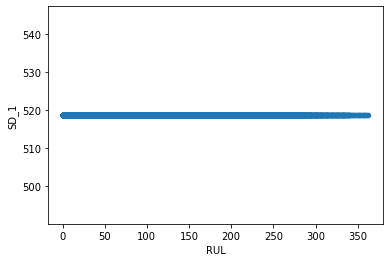

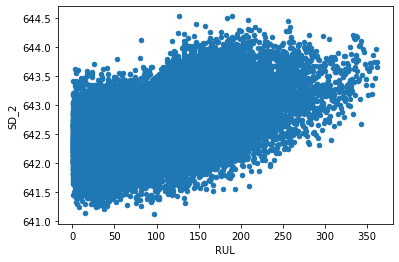

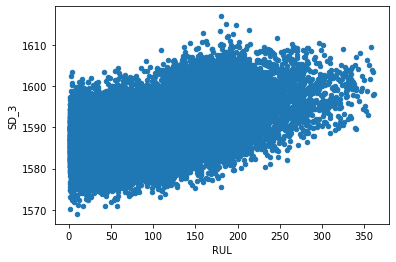

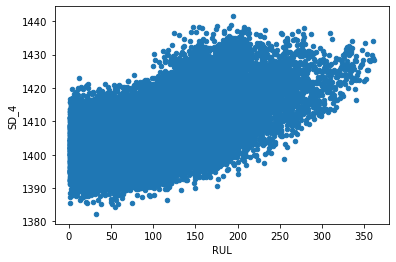

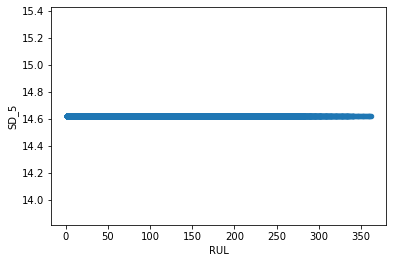

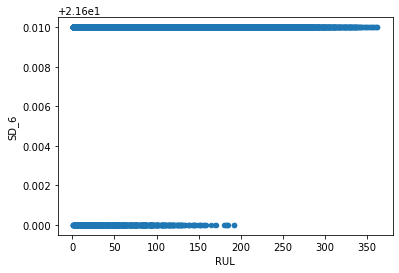

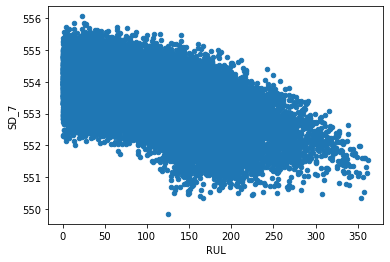

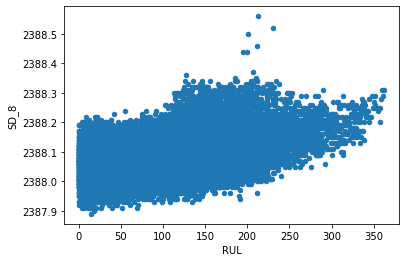

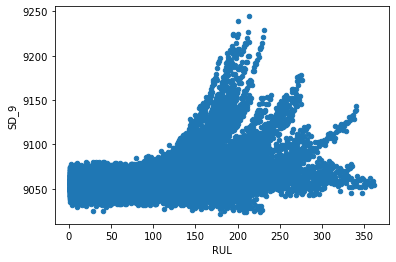

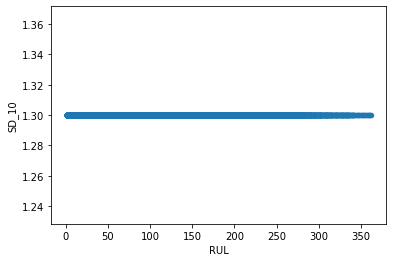

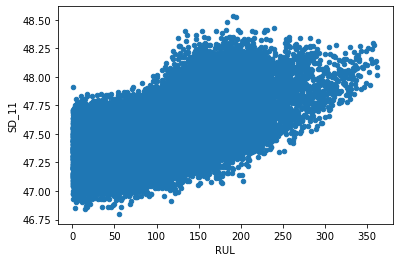

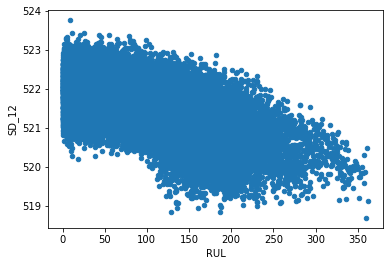

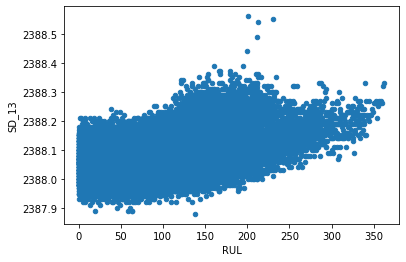

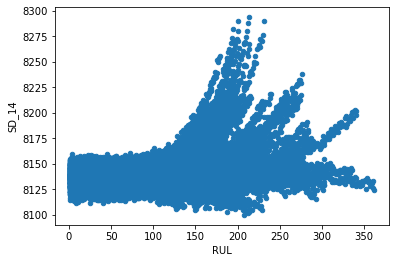

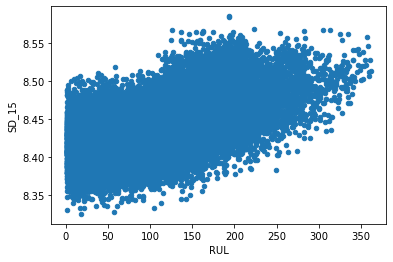

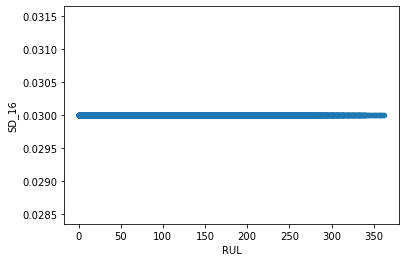

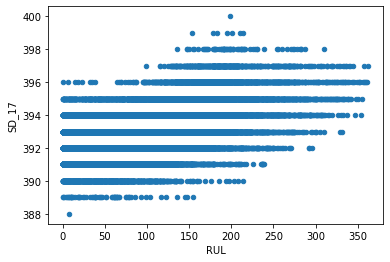

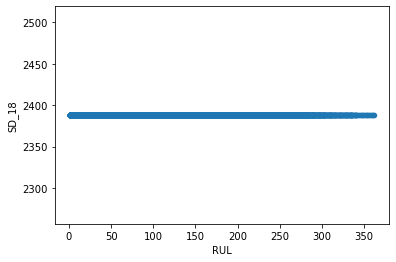

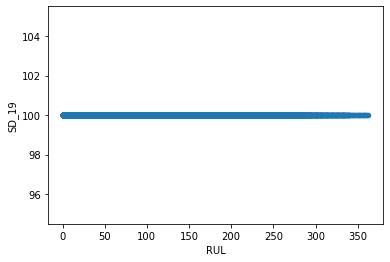

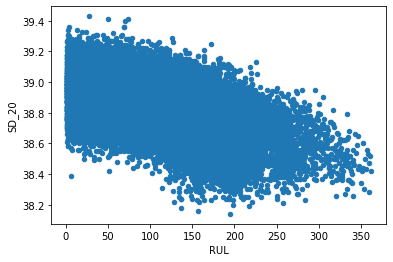

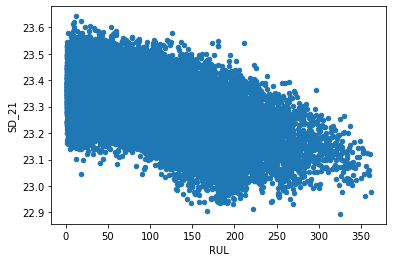

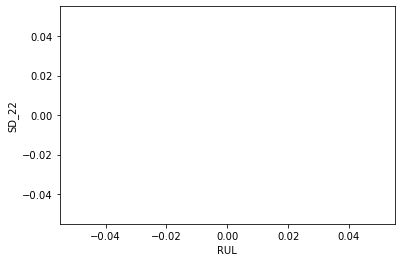

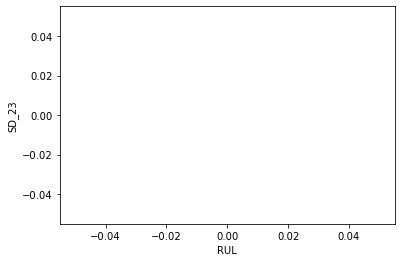

In [11]:
plt.rcParams.update({'figure.max_open_warning': 0})
for i in columns[2:]:
    df.plot(x="RUL", y=i, kind="scatter")

##### Insignificant feature variables with near zero standard deviation and visually evident from scatterplot diagrams w.r.t. RUL column

- OS_3
- SD_1
- SD_5
- SD_10
- SD_16
- SD_18
- SD_19
- SD_22
- SD_23

Note: SD_22 & SD_23 are NULL columns


In [12]:
# Remove columns from df_train and df_test

remove = ['OS_3','SD_1','SD_5','SD_10','SD_16','SD_18','SD_19','SD_22','SD_23']
df.drop(columns=remove, axis=1, inplace=True)


In [13]:
print(f"df: {df.shape}")

df: (33727, 19)


In [16]:
# Prepare X and Y of data

x_col = ['OS_1', 'OS_2', 'SD_2', 'SD_3', 'SD_4', 'SD_6',
       'SD_7', 'SD_8', 'SD_9', 'SD_11', 'SD_12', 'SD_13', 'SD_14', 'SD_15',
       'SD_17', 'SD_20', 'SD_21']
y_col = ['RUL']

df_X = df[x_col]
df_Y = df[y_col]

In [17]:
 # Split into training/testing sets with 25% split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.3,
                                                    random_state=4103)

In [18]:
# Method 1 - Linear Regression
# Simple linear regression, very naive implementation.

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Metrics
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)    

Using Linear Regression, MAE is 36.06
Using Linear Regression, RMSE is 45.91


In [23]:
# Regression Analysis